In [2]:
import os
import numpy as np

In [3]:
os.chdir('D:\\idea projects\\pycharm projects\\ature\\')
from commons.IMAGE import Image
from commons.ImgLATTICE import Lattice
import preprocess.av.image_filters as fil
import cv2 as ocv
from commons.MAT import Mat
import PIL as pil

In [4]:
import preprocess.av.av_utils as av

In [5]:
file = Mat(file_name='wide_image_03.mat')

In [6]:
original = file.get_image('I2')

In [7]:
img = Image(image_arr=original[:,:,1])

In [8]:
img.apply_bilateral(img.img_array)

INFO:root:Applying Bilateral filter.


In [9]:
dif_bilateral = img.get_signed_diff_int8(img.img_array ,img.img_bilateral)

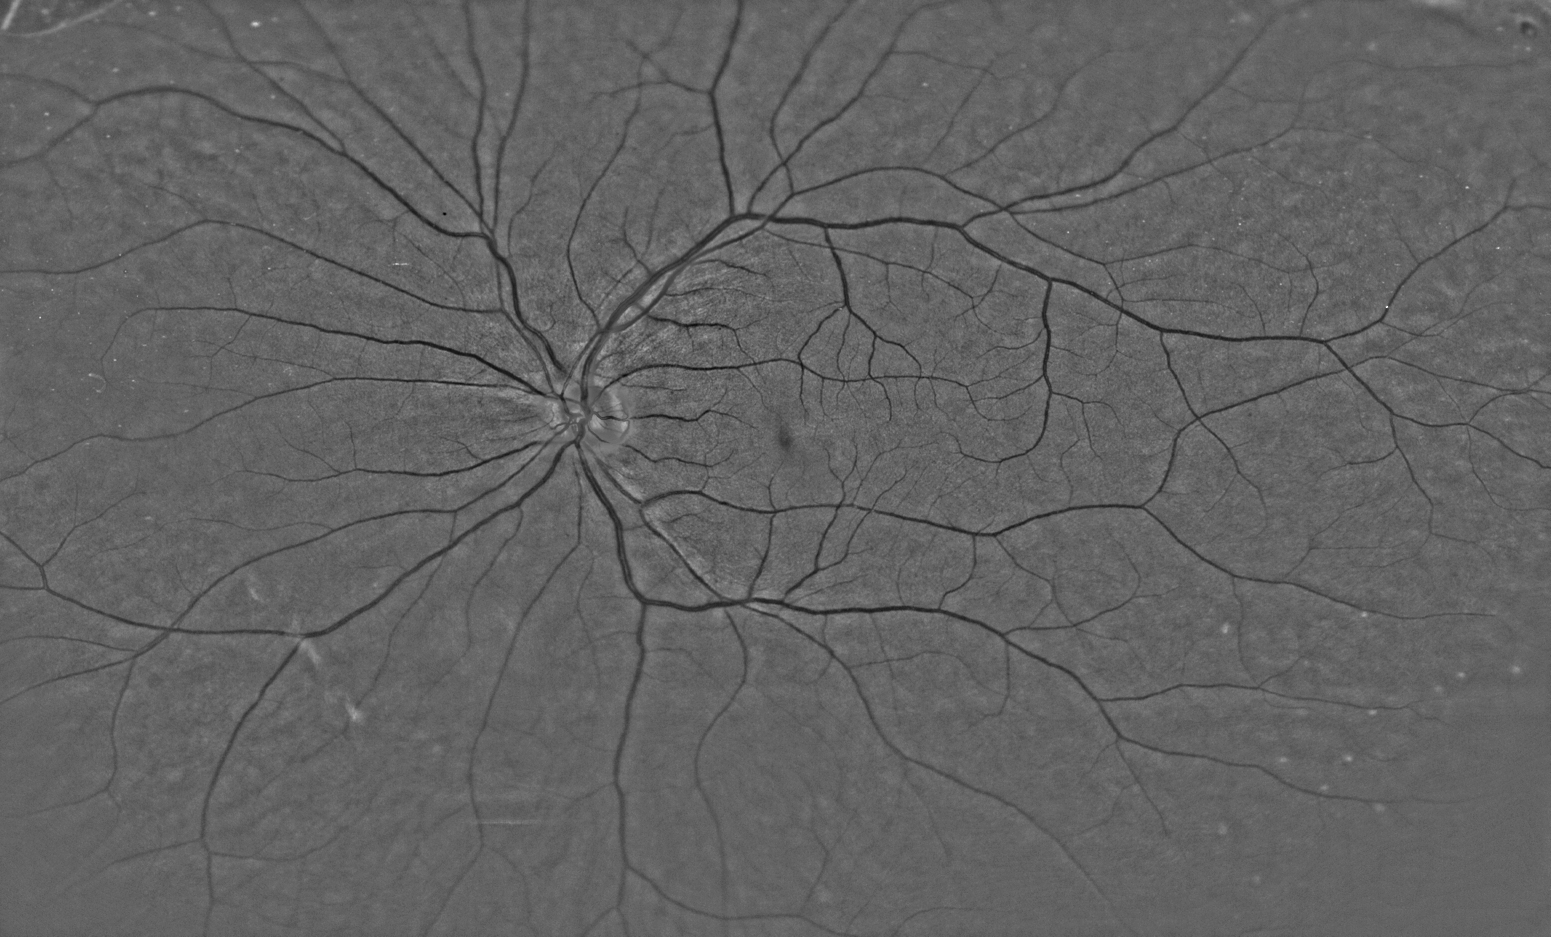

In [10]:
img.from_array(dif_bilateral)

INFO:root:Applying Gabor filter.


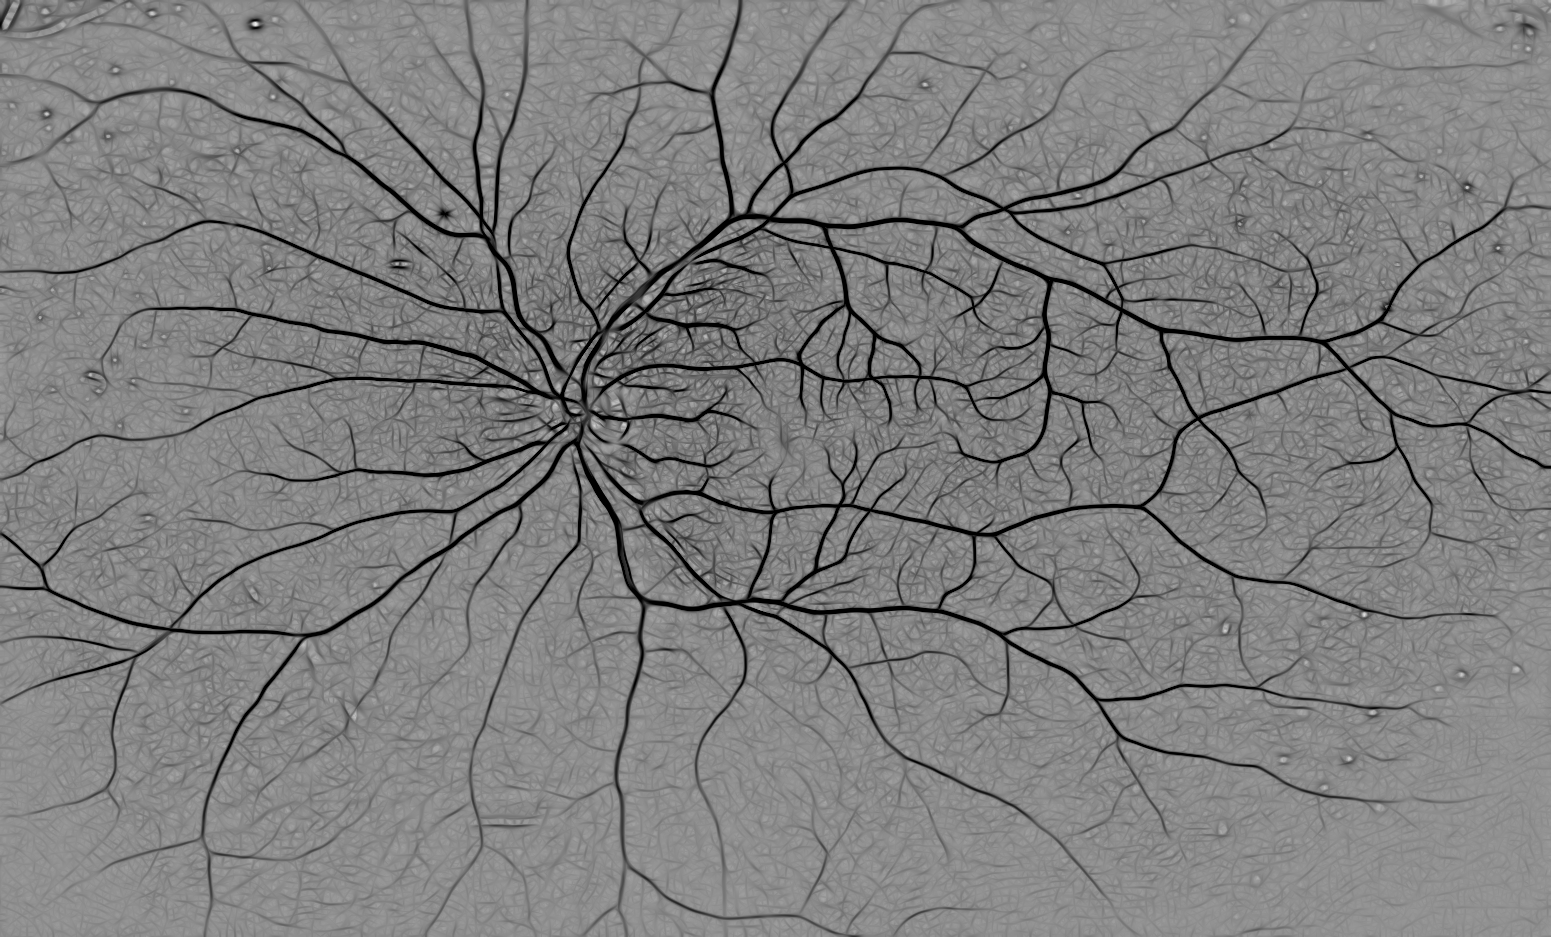

In [11]:
img.apply_gabor(255-dif_bilateral,kernel_bank=fil.get_chosen_gabor_bank())
img.from_array(255-img.img_gabor)

In [12]:
img.create_skeleton_by_threshold(array_2d=img.img_gabor,threshold=5)

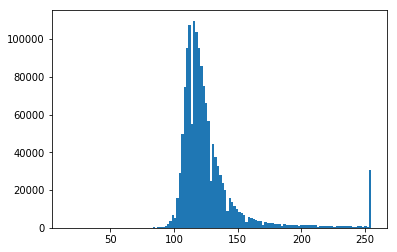

In [13]:
img.histogram(img.img_gabor.ravel(),bins=128)


In [9]:
# img.img_skeleton[255-img.img_gabor]
# img.from_array(img.img_skeleton)

In [15]:
lattice = Lattice(lattice_size=(img.img_array.shape[0],img.img_array.shape[0]))

In [16]:
lattice.generate_lattice_graph(eight_connected=False)

INFO:root:Creating 4-connected lattice.


In [17]:
images =  [(0.25, img.img_array),(0.25, img.img_bilateral), (0.5, img.img_gabor)]

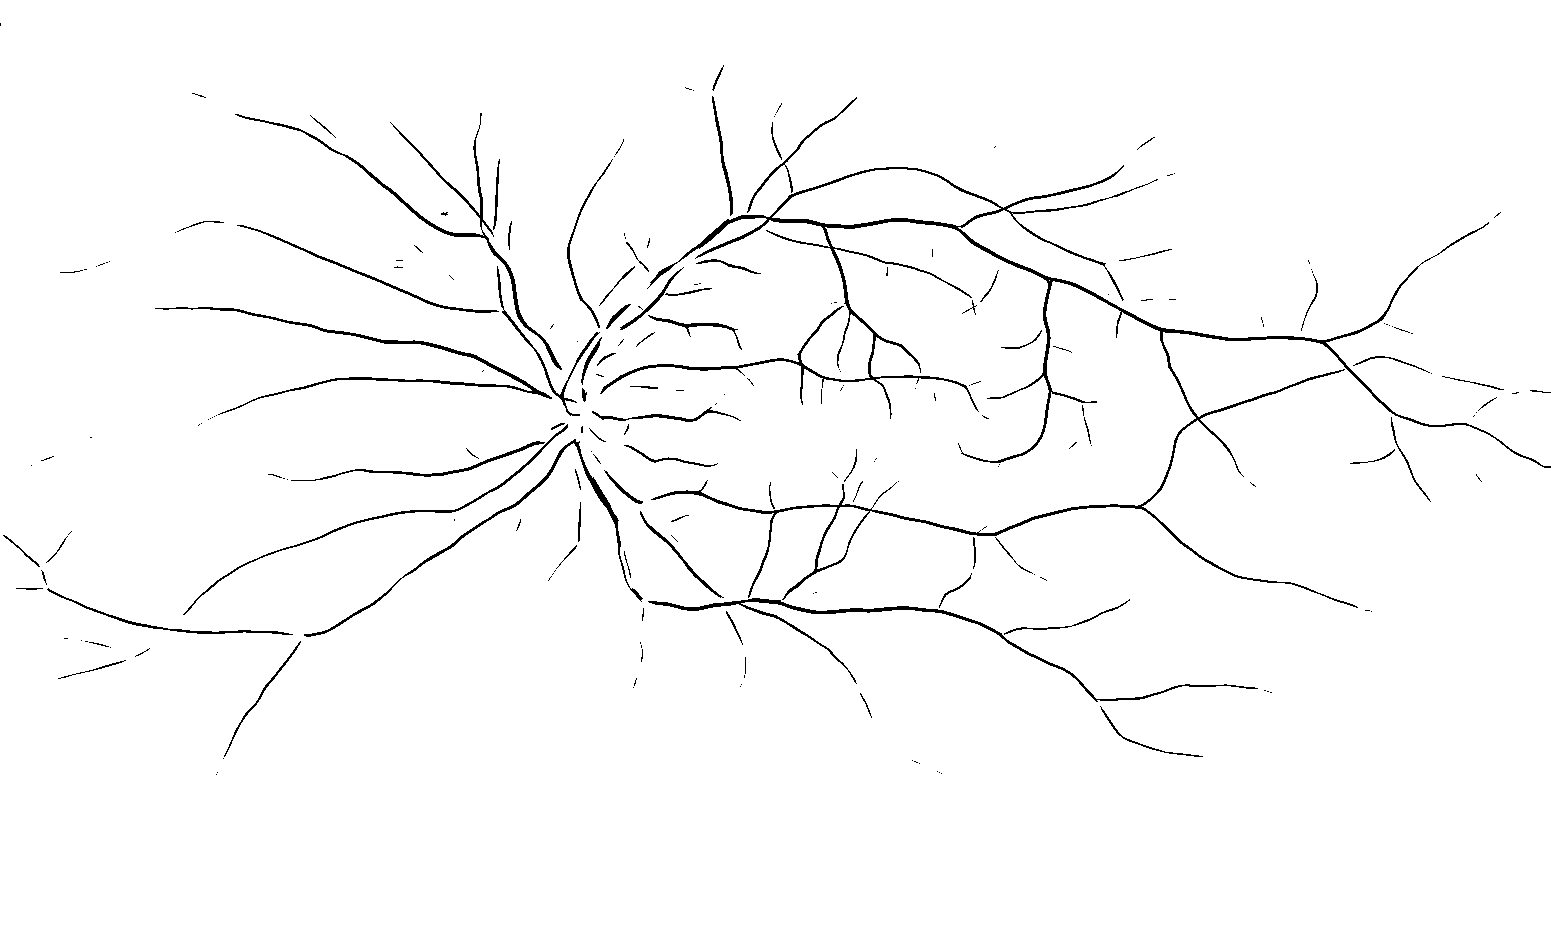

In [18]:
img.from_array(img.img_skeleton)

In [19]:
lattice.chunk_lattice(lattice.lattice, (7,4))

INFO:root:0,0
INFO:root:0,234
INFO:root:0,468
INFO:root:0,702
INFO:root:133,0
INFO:root:133,234
INFO:root:133,468
INFO:root:133,702
INFO:root:266,0
INFO:root:266,234
INFO:root:266,468
INFO:root:266,702
INFO:root:399,0
INFO:root:399,234
INFO:root:399,468
INFO:root:399,702
INFO:root:532,0
INFO:root:532,234
INFO:root:532,468
INFO:root:532,702
INFO:root:665,0
INFO:root:665,234
INFO:root:665,468
INFO:root:665,702
INFO:root:798,0
INFO:root:798,234
INFO:root:798,468
INFO:root:798,702


In [24]:
gp = lattice.k_lattices[0] 
res = lattice.get_lattice_portion(255-img.img_gabor, gp)

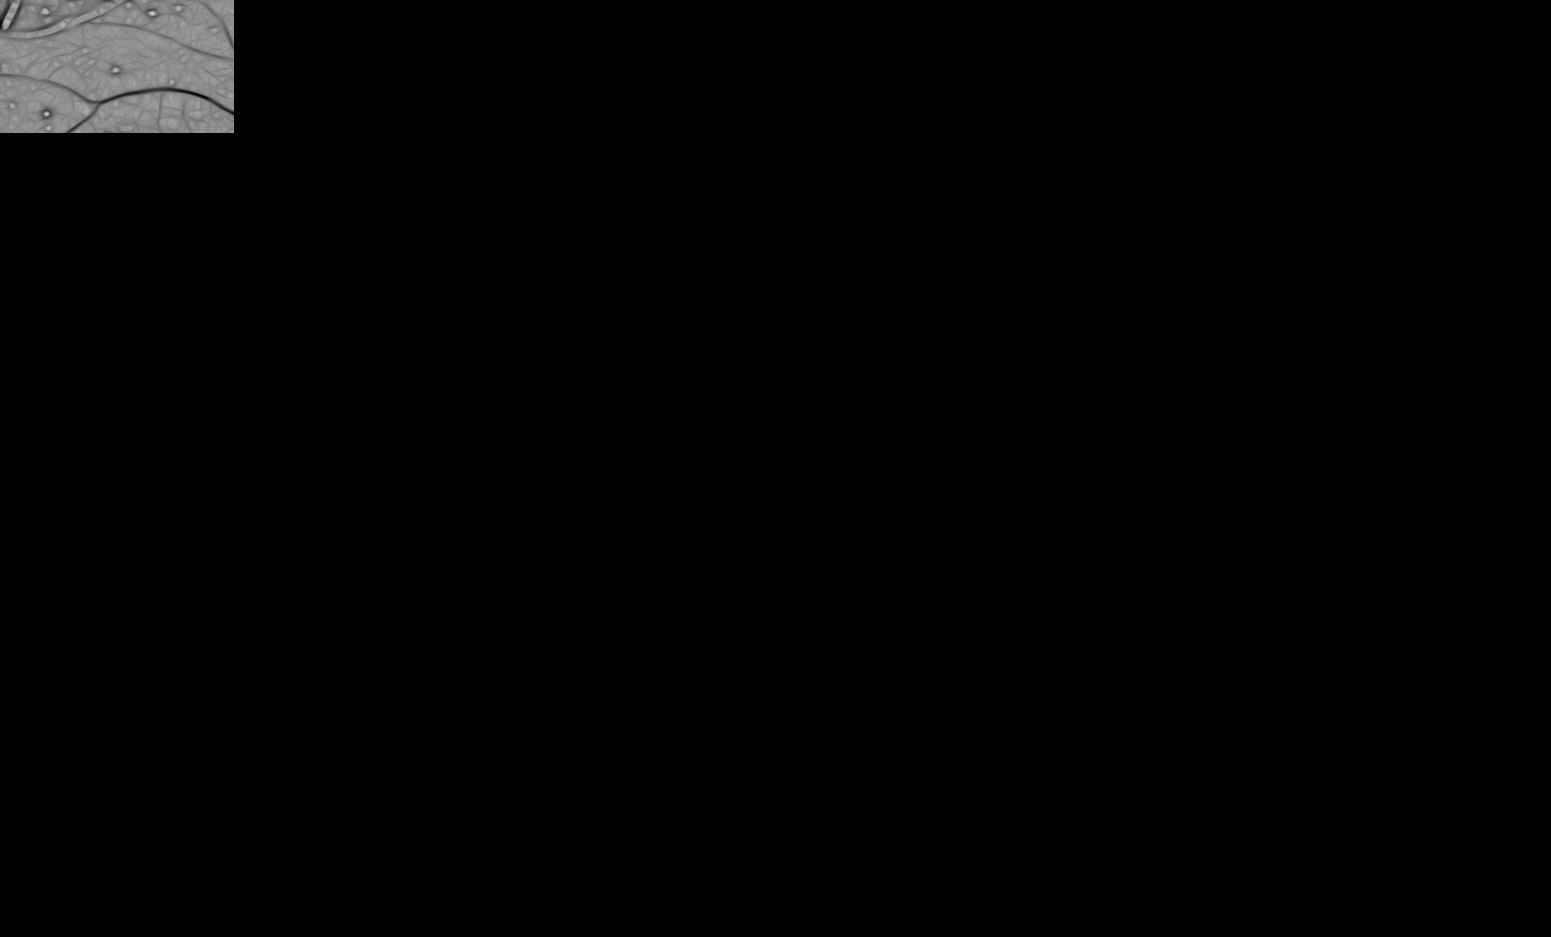

In [25]:
img.from_array(res)

# 

In [27]:
import preprocess.av.lattice_utils as lat

In [28]:
lat.assign_node_metrics(graph=lattice.lattice,metrics=img.img_skeleton)

In [32]:
# lattice.assign_cost(lattice.lattice, images=images, alpha=15)

In [33]:
# lattice.assign_cost(lattice.k_lattices[6], images=images, alpha=15)

In [29]:
can = lattice.k_lattices[6]

In [30]:
lat.assign_cost(graph=can,images=images,alpha=20,log=True)

599: (135, 599)

2193: (142, 555)

3530: (148, 488)

5170: (155, 490)

6655: (161, 571)

7971: (167, 483)

9519: (173, 627)

11164: (180, 634)

12491: (186, 557)

14189: (193, 617)

15694: (200, 484)

17200: (206, 586)

18780: (213, 528)

20653: (221, 529)

22173: (227, 645)

23687: (234, 521)

24897: (239, 561)

26116: (244, 610)

27464: (250, 554)

28521: (254, 675)

30200: (262, 482)

31121: (265, 701)

In [32]:
can[(312, 314)]

{(312, 313): {'cost': 2.9921561831358923,
  'i_diff_1': 4.0,
  'i_diff_2': 0.0,
  'i_diff_3': 20.0},
 (312, 315): {'cost': 1.7052256382370263,
  'i_diff_1': 1.0,
  'i_diff_2': 0.0,
  'i_diff_3': 11.0},
 (313, 314): {'cost': 1.1329230665718177,
  'i_diff_1': 4.0,
  'i_diff_2': 0.0,
  'i_diff_3': 1.0}}

In [24]:
lattice.lattice[(312, 314)]

{(311, 314): {'cost': 1.3641136306802348,
  'i_diff_1': 1.0,
  'i_diff_2': 0.0,
  'i_diff_3': 9.0},
 (312, 313): {'cost': 2.1877744248221838,
  'i_diff_1': 4.0,
  'i_diff_2': 0.0,
  'i_diff_3': 20.0},
 (312, 315): {'cost': 1.4701045966532127,
  'i_diff_1': 1.0,
  'i_diff_2': 0.0,
  'i_diff_3': 11.0},
 (313, 314): {'cost': 1.096614244672777,
  'i_diff_1': 4.0,
  'i_diff_2': 0.0,
  'i_diff_3': 1.0},
 'skeleton': 255}

In [1]:
# prims = nx.algorithms.prim_mst(g,weight='cost')

In [15]:
g[(69,721)]

{(68, 721): {'cost': 1.1326404277198234,
  'i_diff_1': 0.0,
  'i_diff_2': 0.0,
  'i_diff_3': 4.0},
 (69, 720): {'cost': 2.077075464013664,
  'i_diff_1': 3.0,
  'i_diff_2': 0.0,
  'i_diff_3': 19.0},
 (69, 722): {'cost': 1.031211759115756,
  'i_diff_1': 2.0,
  'i_diff_2': 0.0,
  'i_diff_3': 0.0},
 (70, 721): {'cost': 1.0, 'i_diff_1': 0.0, 'i_diff_2': 0.0, 'i_diff_3': 0.0},
 'skeleton': 0}